## Mountains vs Beaches

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [3]:
preferences_df = pd.read_csv('mountains_vs_beaches_preferences.csv')
preferences_df.head(3)

Age  Gender  Income Education_Level  Travel_Frequency Preferred_Activities  \
0   56    male   71477        bachelor                 9               skiing   
1   69    male   88740          master                 1             swimming   
2   46  female   46562          master                 0               skiing   

   Vacation_Budget  Location  Proximity_to_Mountains  Proximity_to_Beaches  \
0             2477     urban                     175                   267   
1             4777  suburban                     228                   190   
2             1469     urban                      71                   280   

  Favorite_Season  Pets  Environmental_Concerns  Preference  
0          summer     0                       1           1  
1            fall     0                       1           0  
2          winter     0                       0           1

#### Shape

In [4]:
preferences_df.shape

(52444, 14)

#### Columns

In [5]:
preferences_df.columns

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns', 'Preference'],
      dtype='object')

#### Dataframe Information

In [6]:
preferences_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


#### Quantiles

In [7]:
preferences_df.describe()

Age         Income  Travel_Frequency  Vacation_Budget  \
count  52444.000000   52444.000000      52444.000000     52444.000000   
mean      43.507360   70017.271280          4.489265      2741.799062   
std       14.985597   28847.560428          2.876130      1296.922423   
min       18.000000   20001.000000          0.000000       500.000000   
25%       31.000000   45048.250000          2.000000      1622.000000   
50%       43.000000   70167.000000          4.000000      2733.000000   
75%       56.000000   95108.500000          7.000000      3869.000000   
max       69.000000  119999.000000          9.000000      4999.000000   

       Proximity_to_Mountains  Proximity_to_Beaches          Pets  \
count            52444.000000          52444.000000  52444.000000   
mean               149.943502            149.888452      0.500858   
std                 86.548644             86.469248      0.500004   
min                  0.000000              0.000000      0.000000   
25%                 75.000000             75.750000      0.000000   
50%                150.000000            150.000000      1.000000   
75%                225.000000            225.000000      1.000000   
max                299.000000            299.000000      1.000000   

       Environmental_Concerns    Preference  
count            52444.000000  52444.000000  
mean                 0.498436      0.250706  
std                  0.500002      0.433423  
min                  0.000000      0.000000  
25%                  0.000000      0.000000  
50%                  0.000000      0.000000  
75%                  1.000000      1.000000  
max                  1.000000      1.000000

## Data Cleaning

#### Remove Duplicates

In [8]:
preferences_df.duplicated().sum()

0

#### Nulls

In [9]:
preferences_df.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

## EDA

#### Columns : Age, Income, Vacation_Budget, Proximity_to_Mountains, Proximity_to_Beaches

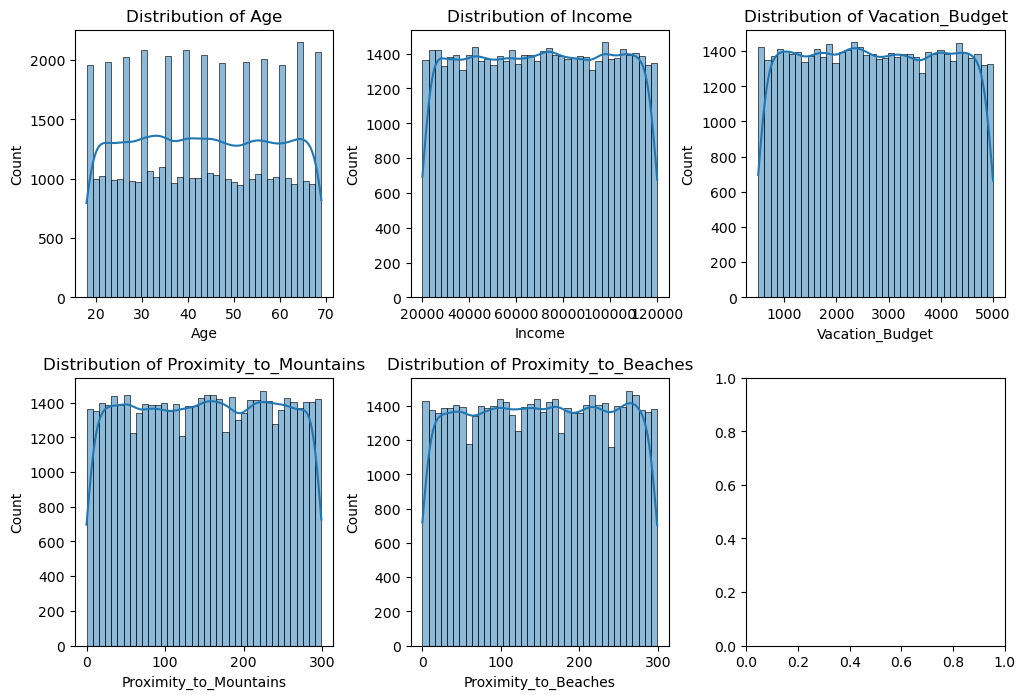

In [10]:
plt.subplots(2,3,figsize=(12,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

columns = ['Age', 'Income', 'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches']

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.histplot(x = i, data = preferences_df, kde = True)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

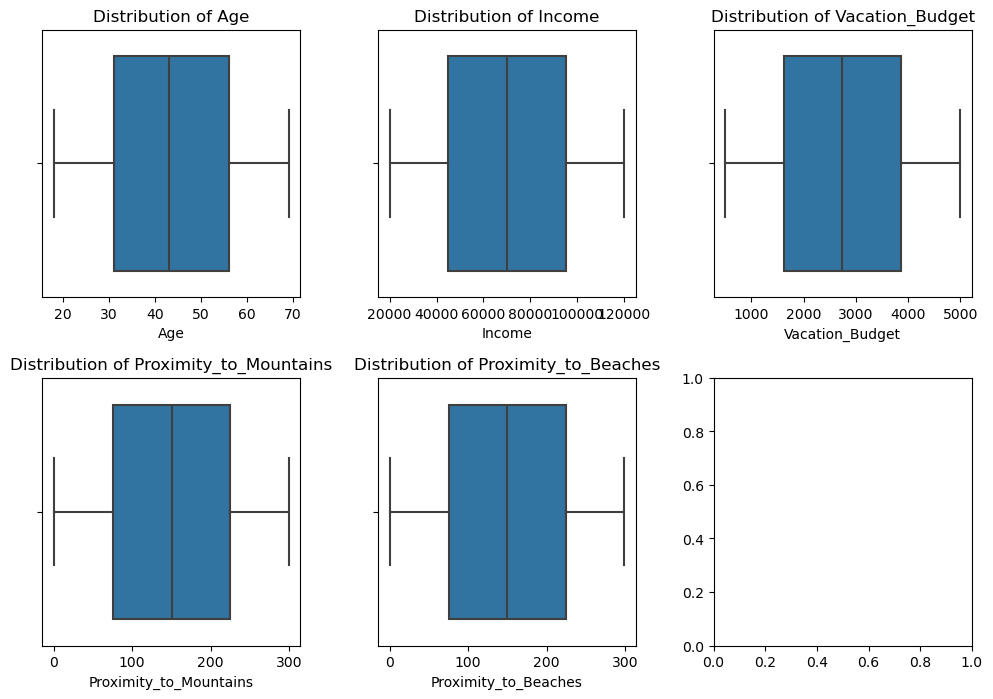

In [11]:
plt.subplots(2,3,figsize=(12,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

columns = ['Age', 'Income', 'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches']

k = 1
for i in columns:
    plt.subplot(2,3,k)
    sns.boxplot(x = i, data = preferences_df)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

#### Columns : Gender, Education_Level, Travel_Frequency, Preferred_Activities, Location, Favorite_Season, Pets, Environmental_Concerns, Preference

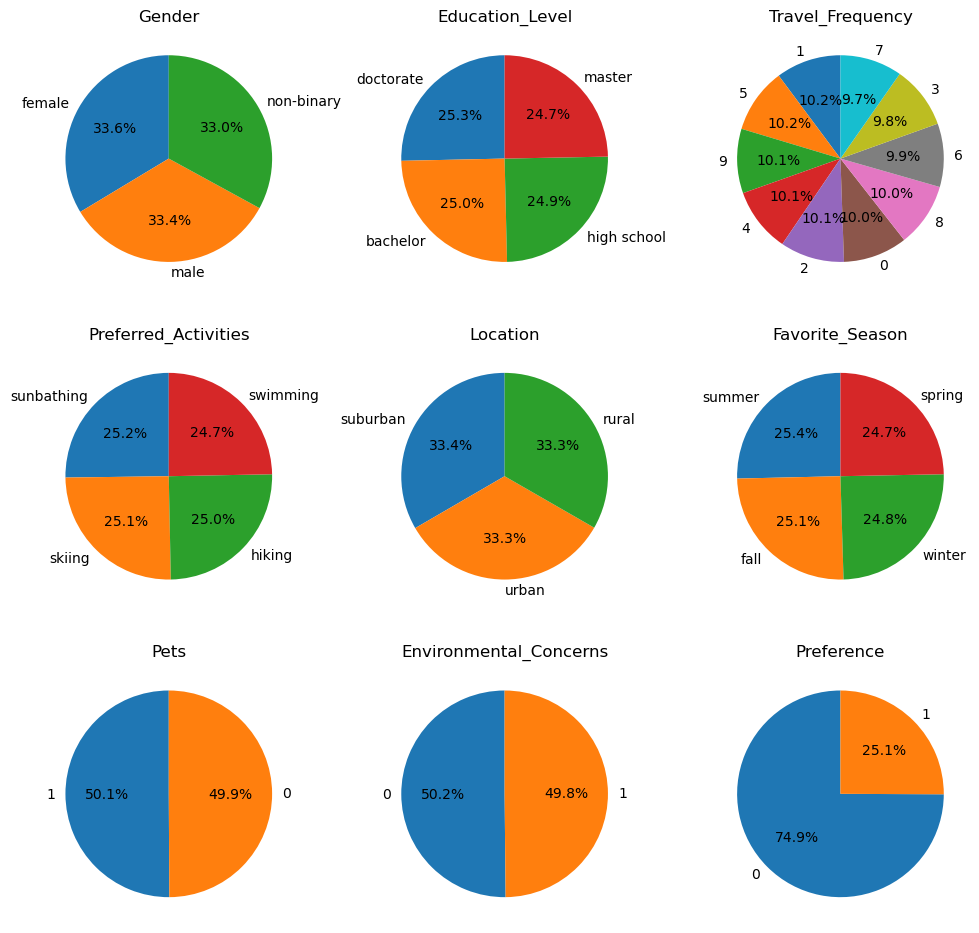

In [12]:
plt.subplots(3,3,figsize = (12,12))
plt.subplots_adjust(wspace=0.3,hspace=0.1)
    
columns=['Gender','Education_Level','Travel_Frequency','Preferred_Activities','Location','Favorite_Season','Pets','Environmental_Concerns','Preference']

k = 1
for i in columns:
    col_dict = dict(preferences_df[i].value_counts())
    plt.subplot(3,3,k)
    plt.pie(x = col_dict.values(), labels = col_dict.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(f'{i}')
    k += 1

plt.show()

## Data Preprocessing

#### Column Transformer

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('scaler', StandardScaler(), ['Age','Income','Vacation_Budget','Proximity_to_Mountains','Proximity_to_Beaches']),
                                     ('encoder', OrdinalEncoder(categories=[['high school', 'bachelor', 'master', 'doctorate']]), ['Education_Level']),
                                     ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 
                                      ['Gender', 'Preferred_Activities', 'Location', 'Favorite_Season'])],
                       remainder='passthrough', sparse_threshold=0)
ct

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('scaler', StandardScaler(),
                                 ['Age', 'Income', 'Vacation_Budget',
                                  'Proximity_to_Mountains',
                                  'Proximity_to_Beaches']),
                                ('encoder',
                                 OrdinalEncoder(categories=[['high school',
                                                             'bachelor',
                                                             'master',
                                                             'doctorate']]),
                                 ['Education_Level']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Gender', 'Preferred_Activities', 'Location',
                                  'Favorite_Season'])])

## Model Building

In [15]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('transformer', ct), ('kmeans', KMeans(n_clusters=2))])
pipe.fit(preferences_df)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'Income',
                                                   'Vacation_Budget',
                                                   'Proximity_to_Mountains',
                                                   'Proximity_to_Beaches']),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['high '
                                                                              'school',
                                                                              'bachelor',
                                                                              'master',
                                                                              'doctorate']]),
                                                  ['Education_Level']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Preferred_Activities',
                                                   'Location',
                                                   'Favorite_Season'])])),
                ('kmeans', KMeans(n_clusters=2))])

## Model Prediction

In [31]:
y_pred = pipe.predict(preferences_df)

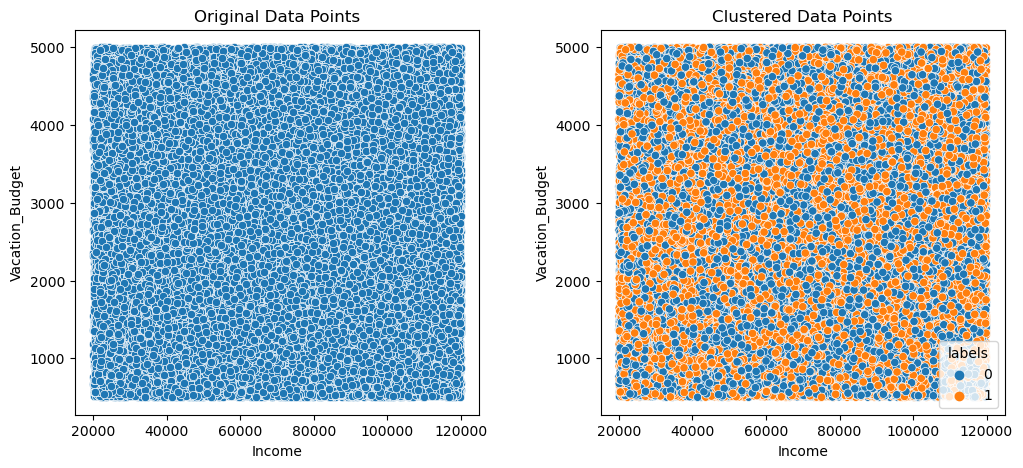

In [35]:
preferences_df['labels'] = y_pred

plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.scatterplot(x = 'Income', y = 'Vacation_Budget', data = preferences_df)
plt.title('Original Data Points')

plt.subplot(1,2,2)
sns.scatterplot(x = 'Income', y = 'Vacation_Budget', data = preferences_df, hue = 'labels')
plt.title('Clustered Data Points')

plt.show()